# https://www.masterofmalt.com/

Barware: https://www.masterofmalt.com/barware/

Bitters: https://www.masterofmalt.com/bitters/

~~ Books: https://www.masterofmalt.com/books-and-posters/ Pass ~~ 

Fruit Purees: https://www.masterofmalt.com/fruit-purees/ 

~~ Glassware: https://www.masterofmalt.com/glassware/ Pass~~ 

~~Liqueurs: https://www.masterofmalt.com/liqueurs/ Pass~~

Mixers: https://www.masterofmalt.com/mixers/

No and low alcohol: https://www.masterofmalt.com/no-and-low/

~~ Oak barrels: https://www.masterofmalt.com/barrel/american-white-oak-barrel/american-white-oak-barrel-1-litre-barrel/ Pass~~ 

Pre-bottled cocktails: https://www.masterofmalt.com/pre_bottled-cocktails/

Syrups and cordials: https://www.masterofmalt.com/syrups-and-cordials/

Vermouth: https://www.masterofmalt.com/vermouth/




## Get data

In [1]:
import os
import time
import requests
from bs4 import BeautifulSoup
import pandas as pd

folder_name = "data"

if not os.path.exists(folder_name):
    os.makedirs(folder_name)


In [2]:


headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36',
    'Referer': 'https://www.masterofmalt.com/',
    'Accept-Language': 'en-US,en;q=0.9',
}

name_lst = []
specification_lst = []
type_lst = []
description_lst = []
original_price_lst = []
current_price_lst = []
label_lst = []
rating_lst = []

category_url_dict = {
    'Barware':'https://www.masterofmalt.com/barware/',
    'Barware': 'https://www.masterofmalt.com/barware/',
    'Bitters': 'https://www.masterofmalt.com/bitters/',
    'Fruit_Purees': 'https://www.masterofmalt.com/fruit-purees/',
    'Mixers': 'https://www.masterofmalt.com/mixers/',
    'No_and_low_alcohol': 'https://www.masterofmalt.com/no-and-low/',
    'Pre-bottled_cocktails': 'https://www.masterofmalt.com/pre_bottled-cocktails/',
    'Syrups_and_cordials': 'https://www.masterofmalt.com/syrups-and-cordials/',
    'Vermouth': 'https://www.masterofmalt.com/vermouth/',
}


In [3]:
def get_one_category_data(prefix_url, category):
    page = 1
    fisrt_page_url = prefix_url + '1/'

    while True:

        # Send GET request and get the page content
        url = f'{prefix_url}{page}/'
        response = requests.get(url, headers=headers)
        if page != 1 and response.url == fisrt_page_url:
            break
        html_content = response.content

        page += 1
        # Parse HTML content
        soup = BeautifulSoup(html_content, 'html.parser')

        # Parse product list
        div_tag_lst = soup.find_all('div', class_="boxBgr product-box-wide h-gutter js-product-box-wide")

        item_index = '0'.zfill(2)
        # Loop through each product
        for div_tag in div_tag_lst:
            # Get product name
            name = div_tag.find('a').text.strip()

            print(page,name)

            # Get product specification
            try:
                specification = div_tag.find('div', class_='product-box-wide-volume').text.strip()
            except:
                specification = None

            # Get product type
            type = div_tag.find('a', class_='product-box-wide-distillery').text.strip()

            # Get product description
            try:
                description = div_tag.find('p', id=f'ContentPlaceHolder1_ctl{item_index}_divDescription').text.strip()
            except:
                description = "Can't get description"

            try:
                # Get original price
                original_price = div_tag.find('span',
                                              id=f'ContentPlaceHolder1_ctl{item_index}_originalPrice').text.strip()
                current_price = div_tag.find('span', class_='product-box-wide-price').text.strip()
            except:
                # # Get original price
                original_price = None
                # Get current price
                try:
                    current_price = div_tag.find('div', class_='product-box-wide-price gold').text.strip()
                except:
                    current_price = None

            # Get label
            try:
                label = div_tag.find('span', class_='label-tag').text.strip()
            except:
                label = None

            # Get rating
            try:
                rating = div_tag.find('div', class_='product-box-wide-rating-wrapper gold').span.get('title')[-4]
            except:
                rating = None

            item_index = str(int(item_index) + 1).zfill(2)

            name_lst.append(name)
            specification_lst.append(specification)
            type_lst.append(type)
            description_lst.append(description)
            original_price_lst.append(original_price)
            current_price_lst.append(current_price)
            label_lst.append(label)
            rating_lst.append(rating)

    # Create an empty DataFrame
    df = pd.DataFrame(
        {'name': name_lst, 'specification': specification_lst, 'type': type_lst, 'description': description_lst,
         'original_price': original_price_lst, 'current_price': current_price_lst, 'label': label_lst,
         'rating': rating_lst, 'category': category})

    df.to_excel(f'data/{category}.xlsx', index=False)
    time.sleep(3)


In [4]:
for category, prefix_url in category_url_dict.items():
    get_one_category_data(prefix_url, category)


## Merge data

In [5]:
import os
import pandas as pd

# Create a DataFrame
df_all = pd.DataFrame()

# Loop through all .xlsx files in the data folder
for filename in os.listdir('data'):
    if filename.endswith('.xlsx'):
        # Read the Excel file
        df = pd.read_excel(f'data/{filename}')
        
        # Add this DataFrame to df_all
        df_all = pd.concat([df_all, df])
# Save the result to a new Excel file
df_all.to_excel('merged_data.xlsx', index=False)


# Data preprocessing and data analysis

In [6]:
df_all = pd.read_excel('merged_data.xlsx')

In [7]:
df = df_all.copy()

In [8]:
df.head()

,name,specification,type,description,original_price,current_price,label,rating,category
0,Drinkworks Home Bar Bundle (£199 worth of pods and a free machine worth over £400),"320cl, 40.7%",Drinkworks,"UK Only._x000D_\nNow this is a bundle and a half! A whole host of Pods and a Drinkworks machine worth over £400, all for £199. We did the maths, and with this bundle you get enough for 64 delicious… More info",£599,£199,Special Offer,NaN,Barware
1,Drinkworks Home Bar Bundle (£99 worth of pods and a free machine worth over £400),"160cl, 38.5%",Drinkworks,"UK Only._x000D_\nNow this is a bundle and a half! A whole host of Pods and a Drinkworks machine worth over £400, all for £99. We did the maths, and with this bundle you get enough for 32 delicious cocktails… More info",£499,£99,Special Offer,NaN,Barware
2,Urban Bar Japanese Mixing Glass 70cl,NaN,Urban Bar,"This Yarai mixing glass is a superb means of mixing a variety of drinks. Very smart-looking, these have a 700ml capacity. Part of Urban Bar's Japanese barware range._x000D_\n_x000D_\nPlease note: You'll want to… More info",NaN,£22,Best Seller,NaN,Barware
3,Drinkworks Home Bar Cocktail Machine - *CLEARANCE SALE* (75% off!),NaN,Drinkworks,"UK Only._x000D_\nYou know those snazzy coffee machines that make fancy coffees at home at the push of a button? Right, so, imagine that, but cocktails. The Drinkworks Home Bar is an astonishingly clever… More info",£399,£99,Best Seller,5.0,Barware
4,Calabrese Cocktail Shaker,NaN,Calabrese,This is a beautiful all-metal two-piece cocktail shaker from Urban Bar. It was made in collaboration with one of the world's leading bartenders - Salvatore Calabrese - and has a 90cl capacity. More info,NaN,£39.95,NaN,NaN,Barware


Through the data preview above, the following problems can be observed:
* 1. Volume data and alcohol content data are in the same cell.
* 2. Price data is in string format and includes unit symbols.
* 3. There are many empty cells.


## Split volume and ABV

In [9]:
# Split the specification columns by commas
df[['volume', 'ABV']] = df['specification'].str.split(',', 1, expand=True)
# delete specification
df.drop(columns=['specification'], inplace=True)


In [10]:
df.head()

,name,type,description,original_price,current_price,label,rating,category,volume,ABV
0,Drinkworks Home Bar Bundle (£199 worth of pods and a free machine worth over £400),Drinkworks,"UK Only._x000D_\nNow this is a bundle and a half! A whole host of Pods and a Drinkworks machine worth over £400, all for £199. We did the maths, and with this bundle you get enough for 64 delicious… More info",£599,£199,Special Offer,NaN,Barware,320cl,40.7%
1,Drinkworks Home Bar Bundle (£99 worth of pods and a free machine worth over £400),Drinkworks,"UK Only._x000D_\nNow this is a bundle and a half! A whole host of Pods and a Drinkworks machine worth over £400, all for £99. We did the maths, and with this bundle you get enough for 32 delicious cocktails… More info",£499,£99,Special Offer,NaN,Barware,160cl,38.5%
2,Urban Bar Japanese Mixing Glass 70cl,Urban Bar,"This Yarai mixing glass is a superb means of mixing a variety of drinks. Very smart-looking, these have a 700ml capacity. Part of Urban Bar's Japanese barware range._x000D_\n_x000D_\nPlease note: You'll want to… More info",NaN,£22,Best Seller,NaN,Barware,NaN,NaN
3,Drinkworks Home Bar Cocktail Machine - *CLEARANCE SALE* (75% off!),Drinkworks,"UK Only._x000D_\nYou know those snazzy coffee machines that make fancy coffees at home at the push of a button? Right, so, imagine that, but cocktails. The Drinkworks Home Bar is an astonishingly clever… More info",£399,£99,Best Seller,5.0,Barware,NaN,NaN
4,Calabrese Cocktail Shaker,Calabrese,This is a beautiful all-metal two-piece cocktail shaker from Urban Bar. It was made in collaboration with one of the world's leading bartenders - Salvatore Calabrese - and has a 90cl capacity. More info,NaN,£39.95,NaN,NaN,Barware,NaN,NaN


## Converts data that should be of numeric type and puts units into column names.

In [11]:
df['original_price'] = df['original_price'].str.replace('£', '').astype(float)
df['current_price'] = df['current_price'].str.replace('£', '').astype(float).astype(float)
df['volume'] = df['volume'].str.replace('cl', '').astype(float)
df['ABV'] = df['ABV'].str.replace('%', '').astype(float)
df = df.rename(columns={'original_price': 'original_price/£','current_price': 'current_price/£','volume': 'volume/cl','ABV': 'ABV/%'})

In [12]:
df

,name,type,description,original_price/£,current_price/£,label,rating,category,volume/cl,ABV/%
0,Drinkworks Home Bar Bundle (£199 worth of pods and a free machine worth over £400),Drinkworks,"UK Only._x000D_\nNow this is a bundle and a half! A whole host of Pods and a Drinkworks machine worth over £400, all for £199. We did the maths, and with this bundle you get enough for 64 delicious… More info",599.0,199.00,Special Offer,NaN,Barware,320.0,40.7
1,Drinkworks Home Bar Bundle (£99 worth of pods and a free machine worth over £400),Drinkworks,"UK Only._x000D_\nNow this is a bundle and a half! A whole host of Pods and a Drinkworks machine worth over £400, all for £99. We did the maths, and with this bundle you get enough for 32 delicious cocktails… More info",499.0,99.00,Special Offer,NaN,Barware,160.0,38.5
2,Urban Bar Japanese Mixing Glass 70cl,Urban Bar,"This Yarai mixing glass is a superb means of mixing a variety of drinks. Very smart-looking, these have a 700ml capacity. Part of Urban Bar's Japanese barware range._x000D_\n_x000D_\nPlease note: You'll want to… More info",NaN,22.00,Best Seller,NaN,Barware,NaN,NaN
3,Drinkworks Home Bar Cocktail Machine - *CLEARANCE SALE* (75% off!),Drinkworks,"UK Only._x000D_\nYou know those snazzy coffee machines that make fancy coffees at home at the push of a button? Right, so, imagine that, but cocktails. The Drinkworks Home Bar is an astonishingly clever… More info",399.0,99.00,Best Seller,5.0,Barware,NaN,NaN
4,Calabrese Cocktail Shaker,Calabrese,This is a beautiful all-metal two-piece cocktail shaker from Urban Bar. It was made in collaboration with one of the world's leading bartenders - Salvatore Calabrese - and has a 90cl capacity. More info,NaN,39.95,NaN,NaN,Barware,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1396,Londinio Red Vermouth,Londinio,"This is a red vermouth produced by the Londinio folks - the very same people behind the excellent Londinio Aperitivo and Londinio Amaro liqueurs. Certainly, this London-born vermouth will make for… More info",NaN,19.24,NaN,5.0,Vermouth,75.0,16.0
1397,Atxa Red Vermouth,Atxa,"A Spanish red vermouth made to an old family recipe, which takes a blend of a neutral wine and alcohol macerated with a selection of traditional botanicals including wormwood, gentian, and cherry to… More info",NaN,16.95,NaN,NaN,Vermouth,100.0,15.0
1398,Golfo Vermut Tinto,Golfo,This interesting Spanish vermouth was made exclusively using Tempranillo grapes and aged in oak casks before bottling. Very intriguing stuff - we're expecting big things from you cocktail enthusiasts… More info,NaN,25.24,NaN,4.0,Vermouth,75.0,15.0
1399,Quaglia Berto Vermouth di Torino Superiore Rosso 1L,Antica Distilleria Quaglia,"Hey, Quaglia's Berto Vermouth di Torino Superiore Rosso is great, isn't it? Infusing all those herbs and spices like vanilla, juniper, and wormwood into the spirit for 60 days before blending it with… More info",NaN,27.95,NaN,NaN,Vermouth,100.0,17.0


## The original price of a cocktail that has not been discounted should be the same as the current price.

In [13]:
df['original_price/£'] = df['original_price/£'].fillna(df['current_price/£'])

## Delete rows where all columns are empty

In [14]:
df.dropna(how='all', inplace=True)

## Delete duplicate value

In [15]:
df = df.drop_duplicates()

In [16]:
df

,name,type,description,original_price/£,current_price/£,label,rating,category,volume/cl,ABV/%
0,Drinkworks Home Bar Bundle (£199 worth of pods and a free machine worth over £400),Drinkworks,"UK Only._x000D_\nNow this is a bundle and a half! A whole host of Pods and a Drinkworks machine worth over £400, all for £199. We did the maths, and with this bundle you get enough for 64 delicious… More info",599.00,199.00,Special Offer,NaN,Barware,320.0,40.7
1,Drinkworks Home Bar Bundle (£99 worth of pods and a free machine worth over £400),Drinkworks,"UK Only._x000D_\nNow this is a bundle and a half! A whole host of Pods and a Drinkworks machine worth over £400, all for £99. We did the maths, and with this bundle you get enough for 32 delicious cocktails… More info",499.00,99.00,Special Offer,NaN,Barware,160.0,38.5
2,Urban Bar Japanese Mixing Glass 70cl,Urban Bar,"This Yarai mixing glass is a superb means of mixing a variety of drinks. Very smart-looking, these have a 700ml capacity. Part of Urban Bar's Japanese barware range._x000D_\n_x000D_\nPlease note: You'll want to… More info",22.00,22.00,Best Seller,NaN,Barware,NaN,NaN
3,Drinkworks Home Bar Cocktail Machine - *CLEARANCE SALE* (75% off!),Drinkworks,"UK Only._x000D_\nYou know those snazzy coffee machines that make fancy coffees at home at the push of a button? Right, so, imagine that, but cocktails. The Drinkworks Home Bar is an astonishingly clever… More info",399.00,99.00,Best Seller,5.0,Barware,NaN,NaN
4,Calabrese Cocktail Shaker,Calabrese,This is a beautiful all-metal two-piece cocktail shaker from Urban Bar. It was made in collaboration with one of the world's leading bartenders - Salvatore Calabrese - and has a 90cl capacity. More info,39.95,39.95,NaN,NaN,Barware,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1396,Londinio Red Vermouth,Londinio,"This is a red vermouth produced by the Londinio folks - the very same people behind the excellent Londinio Aperitivo and Londinio Amaro liqueurs. Certainly, this London-born vermouth will make for… More info",19.24,19.24,NaN,5.0,Vermouth,75.0,16.0
1397,Atxa Red Vermouth,Atxa,"A Spanish red vermouth made to an old family recipe, which takes a blend of a neutral wine and alcohol macerated with a selection of traditional botanicals including wormwood, gentian, and cherry to… More info",16.95,16.95,NaN,NaN,Vermouth,100.0,15.0
1398,Golfo Vermut Tinto,Golfo,This interesting Spanish vermouth was made exclusively using Tempranillo grapes and aged in oak casks before bottling. Very intriguing stuff - we're expecting big things from you cocktail enthusiasts… More info,25.24,25.24,NaN,4.0,Vermouth,75.0,15.0
1399,Quaglia Berto Vermouth di Torino Superiore Rosso 1L,Antica Distilleria Quaglia,"Hey, Quaglia's Berto Vermouth di Torino Superiore Rosso is great, isn't it? Infusing all those herbs and spices like vanilla, juniper, and wormwood into the spirit for 60 days before blending it with… More info",27.95,27.95,NaN,NaN,Vermouth,100.0,17.0


## Now, the data can be analyzed further, although there are still many empty data, but these empty data does not affect the subsequent analysis.

In [17]:
from plotnine import *
import matplotlib.pyplot as plt
import numpy as np

# Analysis


## Discount analysis

In [18]:
import pandas as pd

# Calculate the discount percentage
df['discount_percent'] = (df['original_price/£'] - df['current_price/£']) / df['original_price/£'] * 100

# Count the number of discounted and undiscounted items
discounted_count = (df['current_price/£'] < df['original_price/£']).sum()
undiscounted_count = (df['current_price/£'] == df['original_price/£']).sum()

# Find the items with maximum and minimum discount
max_discount = df.loc[df['discount_percent'].idxmax()]
min_discount = df.loc[df['discount_percent'].idxmin()]

# Calculate the average discount percentage
avg_discount = df['discount_percent'].mean()

# Output the results
print(f"Maximum discount: {max_discount['discount_percent']:.2f}% ({max_discount['name']})")
print(f"Minimum discount: {min_discount['discount_percent']:.2f}% ({min_discount['name']})")
print(f"Average discount: {avg_discount:.2f}%")


Maximum discount: 80.16% (Drinkworks Home Bar Bundle (£99 worth of pods and a free machine worth over £400))
Minimum discount: 0.00% (Urban Bar Japanese Mixing Glass 70cl)
Average discount: 0.28%


## The average rating for all types of cocktails

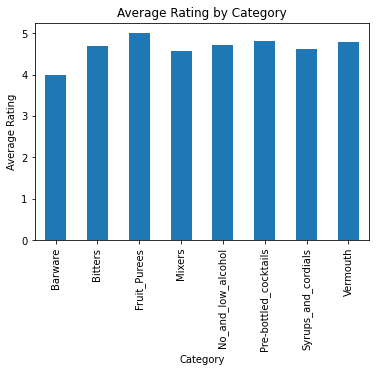

In [19]:
import matplotlib.pyplot as plt

category_ratings = df.groupby('category').mean()['rating']
category_ratings.plot(kind='bar')
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.show()


## Average price of all types

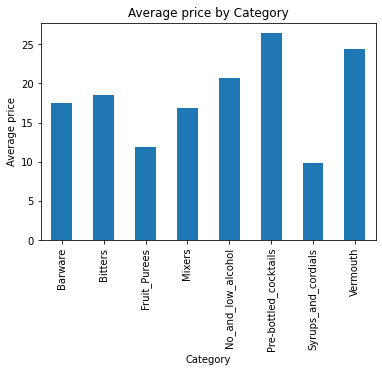

In [20]:
import matplotlib.pyplot as plt

category_ratings = df.groupby('category').mean()['current_price/£']
category_ratings.plot(kind='bar')
plt.title('Average price by Category')
plt.xlabel('Category')
plt.ylabel('Average price')
plt.show()


## The relationship between discount degree and label

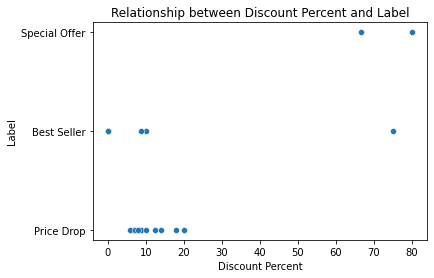

In [21]:
import seaborn as sns

# Plot a scatter plot
sns.scatterplot(data=df, x='discount_percent', y='label')

# Add axis labels and title
plt.xlabel('Discount Percent')
plt.ylabel('Label')
plt.title('Relationship between Discount Percent and Label')

# Show the plot
plt.show()


As can be seen from the figure, most cocktails with labels have Price discounts. Among them, the discount of products with Price Drop label is about 10%-20%, and the discount of cocktails with Speical Offer is great, about 60%-80%.

##  Distilleries discounts on all kinds of cocktails

In [22]:
top_10_types = df.groupby('type').count().sort_values(by='name', ascending=False).head(10)
top_categories = df[df['type'].isin(top_10_types.index)].groupby(['type', 'category']).count()['name']
tmp_lst = []
for i in top_categories.index:
    if i[0] not in tmp_lst:
        tmp_lst.append(i[0])
top_categories = df[df['type'].isin(top_10_types.index)].groupby(['type', 'category']).count()['name'].unstack()

In [23]:
type_discounts = df.groupby(['type', 'discount_percent']).mean()['current_price/£']
type_discounts = type_discounts.groupby('type').mean()


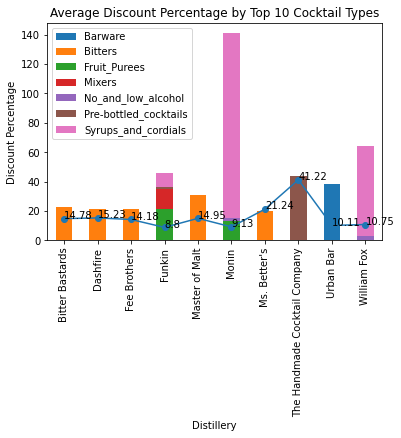

In [28]:
type_discounts_top10 = type_discounts[tmp_lst]
top_categories.plot(kind='bar', stacked=True)
plt.legend(loc='best')
plt.title('Top 10 Cocktail Distilleries and Categories')

plt.ylabel('Count')
type_discounts_top10.plot(kind='line', marker='o')
plt.title('Average Discount Percentage by Top 10 Cocktail Types')
plt.xlabel('Distillery')
plt.ylabel('Discount Percentage')

plt.xticks(rotation=90)
for i, val in enumerate(type_discounts_top10):
    plt.text(i, val, str(round(val,2)))

plt.show()


* The figure above calculates the number and discount of various products from various manufacturers. The result shows that the highest discount is The Handmade Cocktail Company. The average discount of distilleriy is more than 40%, all of which are Pre-bottled_cocktails


## Feature correlation calculation is carried out for the data whose score item is not empty

In [25]:
rating_df = df[~df['rating'].isna()]


<AxesSubplot:>

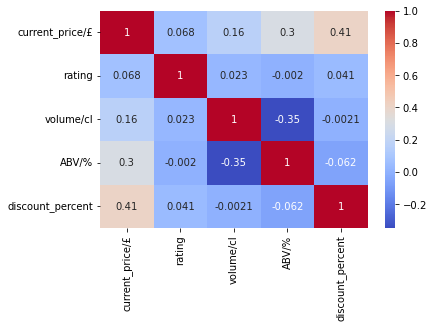

In [26]:
cols_to_analyze = ['type', 'current_price/£', 'rating', 'category', 'volume/cl', 'ABV/%', 'discount_percent']
corr_matrix = rating_df[cols_to_analyze].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


As can be seen from the correlation heatmap, discount ratio is correlated with price, and ABV and volume also show a positive correlation with price, that is, cocktails with higher alcohol content or larger volume are more expensive, while ABV is negatively correlated with discount intensity, and cocktails with higher alcohol content are less discount intensity. The ratings had some correlation with price, the strength of the offer, the size of the cocktail, and almost no correlation with alcohol content.